# value house R , U

In [1]:
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
r_house=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\R_arzesh_khane.csv")
u_house=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\U_arzesh_khane.csv")
r_house.head()

,per_meter
0,0.742898
1,0.619082
2,27.858671
3,2.228694
4,7.428979


In [2]:
u_house.head()

,per_meter
0,12.808680
1,6.190862
2,2.785888
3,6.686131
4,27.014670


### check distribution of data (normal or not)

<Axes: ylabel='Count'>

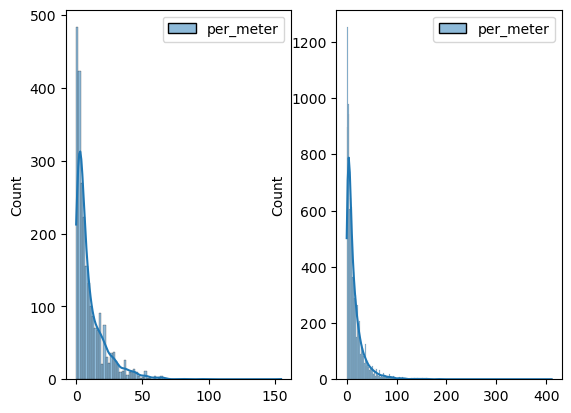

In [3]:
fig_houses, ax_houses = plt.subplots(1, 2)
sns.histplot(r_house, ax=ax_houses[0], kde=True)
sns.histplot(u_house, ax=ax_houses[1], kde=True)

نمودار توزیع دیتا به فرم نرمال نیست.


تست نرمال بودن دیتا را با یک روش دیگر هم انجام می دهیم:

In [4]:
stat, p_value = sp.stats.shapiro(r_house)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


In [5]:
stat, p_value = sp.stats.shapiro(u_house)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11163.
  res = hypotest_fun_out(*samples, **kwds)


چون تعداد داده های خانه های شهری بیشتر از 5000 داده است و ممکن است تست فوق دچار خطا شود، از تست جایگزین زیر استفاده می کنیم

In [6]:
result = sp.stats.anderson(u_house.per_meter)

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

	sl, cv = result.significance_level[i], result.critical_values[i]

	if result.statistic < result.critical_values[i]:

		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))

	else:

		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 976.127
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Hypothesis test

In [7]:
#u_test

u_statistics, p_value = sp.stats.mannwhitneyu(r_house, u_house , alternative='two-sided')

print(f'statistic: {u_statistics}, p-value: {p_value}')

if p_value <0.05:

  print("we reject null hypothesis")

else:

  print("we accept null hypothesis")

statistic: [11347983.], p-value: [6.66679949e-51]
we reject null hypothesis


یعنی به طور میانگین تفاوت مشهودی میان ارزش خانه های شهری و روستایی وجود دارد

# members_incomes_by_education

In [54]:
members_education_u1401=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_u1401.csv")
members_education_u1400=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_u1400.csv")
members_education_u99=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_u99.csv")
members_education_u98=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_u98.csv")
members_education_r1401=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_r1401.csv")
members_education_r1400=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_r1400.csv")
members_education_r99=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_r99.csv")
members_education_r98=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\members_incomes_by_education_dataset_r98.csv")
members_education_u1401.head()

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Diploma,852080008.0,0.0,207000000.0,735000.0,1.059815e+09
1,10001000425,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
2,10001000426,1,Elemantry,400000000.0,0.0,740000000.0,735000.0,1.140735e+09
3,10001000432,1,College,0.0,0.0,985000000.0,735000.0,9.857350e+08
4,10001000432,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06


In [55]:
members_education=pd.concat([members_education_u1401,members_education_u1400 ,members_education_u99, members_education_u98 , members_education_r1401 , members_education_r1400 , members_education_r99, members_education_r98] , axis=0)
members_education

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Diploma,852080008.0,0.0,207000000.0,735000.0,1.059815e+09
1,10001000425,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
2,10001000426,1,Elemantry,400000000.0,0.0,740000000.0,735000.0,1.140735e+09
3,10001000432,1,College,0.0,0.0,985000000.0,735000.0,9.857350e+08
4,10001000432,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
...,...,...,...,...,...,...,...,...
28232,23001701014,1,Secondary,0.0,360000000.0,4120000.0,10920000.0,3.750400e+08
28233,23001701017,1,Elemantry,0.0,0.0,189520000.0,16380000.0,2.059000e+08
28234,23001701017,3,College,192000000.0,0.0,0.0,0.0,1.920000e+08
28235,23001701020,1,Secondary,0.0,336000000.0,5520000.0,16380000.0,3.579000e+08


In [56]:
members_education.degree.unique()

array(['Diploma', 'Elemantry', 'College', 'Master', 'Secondary',
       'Bachelor', 'No degree', 'Other', 'HighSchool', 'PhD'],
      dtype=object)

In [57]:
No_degree=members_education[(members_education.degree.str.contains('Elemantry'))|(members_education.degree.str.contains('No degree'))|(members_education.degree.str.contains('Secondary'))|(members_education.degree.str.contains('HighSchool'))|(members_education.degree.str.contains('Diploma'))|(members_education.degree.str.contains('Other'))]
degree=members_education[(members_education.degree.str.contains('Bachelor'))|(members_education.degree.str.contains('Master'))|(members_education.degree.str.contains('College'))|(members_education.degree.str.contains('PhD'))]
No_degree.head()

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Diploma,852080008.0,0.0,207000000.0,735000.0,1.059815e+09
1,10001000425,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
2,10001000426,1,Elemantry,400000000.0,0.0,740000000.0,735000.0,1.140735e+09
4,10001000432,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
7,10001000435,2,Secondary,0.0,0.0,0.0,9555000.0,9.555000e+06


In [58]:
degree.head()

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
3,10001000432,1,College,0.0,0.0,9.850000e+08,735000.0,9.857350e+08
5,10001000432,3,Master,673200000.0,0.0,0.000000e+00,0.0,6.732000e+08
6,10001000435,1,College,0.0,0.0,1.400000e+09,735000.0,1.400735e+09
14,10001000926,2,Bachelor,0.0,0.0,9.560000e+08,8190000.0,9.641900e+08
15,10001000930,1,Master,770400000.0,0.0,5.230000e+07,630000.0,8.233300e+08


In [59]:
degree_incom=degree.drop(['Address' , 'member' , 'Hoghugh_Income' , 'Azad_Income' , 'degree', 'Other_Income' , 'Yarane_Income'] , axis=1)

degree_incom

,total_income
3,9.857350e+08
5,6.732000e+08
6,1.400735e+09
14,9.641900e+08
15,8.233300e+08
...,...
28191,2.040000e+08
28198,2.160000e+08
28208,2.164267e+08
28217,3.291400e+08


In [60]:
No_degree_incom=No_degree.drop(['Address' , 'member' , 'Hoghugh_Income' , 'Azad_Income' , 'degree', 'Other_Income' , 'Yarane_Income'] , axis=1)
No_degree_incom

,total_income
0,1.059815e+09
1,6.370000e+06
2,1.140735e+09
4,6.370000e+06
7,9.555000e+06
...,...
28231,2.927200e+08
28232,3.750400e+08
28233,2.059000e+08
28235,3.579000e+08


### check distribution of data (no Inflation)

<Axes: ylabel='Count'>

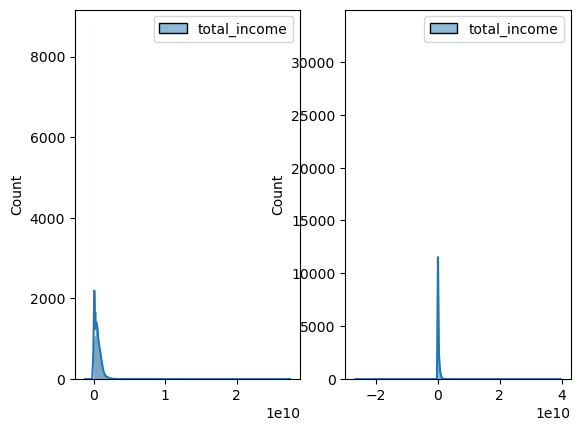

In [61]:
fig_degrees, ax_degrees = plt.subplots(1, 2)
sns.histplot(degree_incom, ax=ax_degrees[0], kde=True)
sns.histplot(No_degree_incom, ax=ax_degrees[1], kde=True)

In [62]:
stat, p_value = sp.stats.shapiro(degree_incom)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40260.
  res = hypotest_fun_out(*samples, **kwds)


In [63]:
stat, p_value = sp.stats.shapiro(No_degree_incom)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 238757.
  res = hypotest_fun_out(*samples, **kwds)


### hypothesis

In [64]:
#u_test

u_statistics, p_value = sp.stats.mannwhitneyu(degree_incom, No_degree_incom , alternative='two-sided')

print(f'statistic: {u_statistics}, p-value: {p_value}')

if p_value <0.05:

  print("we reject null hypothesis")

else:

  print("we accept null hypothesis")

statistic: [6.25744533e+09], p-value: [0.]
we reject null hypothesis


### Calculate Real Income by Inflation and delet outliers

In [41]:
members_education_98 = pd.concat([members_education_u98, members_education_r98], axis=0)
members_education_99 = pd.concat([members_education_u99, members_education_r99], axis=0)
members_education_1400 = pd.concat([members_education_u1400, members_education_r1400], axis=0)
members_education_1401 = pd.concat([members_education_u1401, members_education_r1401], axis=0)
members_education_1401

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Diploma,852080008.0,0.0,207000000.0,735000.0,1.059815e+09
1,10001000425,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
2,10001000426,1,Elemantry,400000000.0,0.0,740000000.0,735000.0,1.140735e+09
3,10001000432,1,College,0.0,0.0,985000000.0,735000.0,9.857350e+08
4,10001000432,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
...,...,...,...,...,...,...,...,...
38311,21702575838,1,Elemantry,354000000.0,0.0,137300000.0,1260000.0,4.925600e+08
38312,21702575838,2,Secondary,0.0,0.0,12300000.0,16380000.0,2.868000e+07
38313,21702575838,5,No degree,0.0,0.0,0.0,1820000.0,1.820000e+06
38314,21702575841,1,Elemantry,342000000.0,38500000.0,6450000.0,0.0,3.869500e+08


In [42]:
def calculate_real_income(nominal_df, inflation_rate):
    real_data = nominal_df.copy()
    real_data['total_income'] = real_data['total_income'] / (1 + inflation_rate)
    return real_data

In [43]:
year_1398_inflation_rate= 0.412
year_1399_inflation_rate= year_1398_inflation_rate + 0.471
year_1400_inflation_rate= year_1399_inflation_rate + 0.462
year_1401_inflation_rate= year_1400_inflation_rate + 0.465
real_year_1398 = calculate_real_income(members_education_98, year_1398_inflation_rate)
real_year_1399 = calculate_real_income(members_education_99, year_1399_inflation_rate)
real_year_1400 = calculate_real_income(members_education_1400, year_1400_inflation_rate)
real_year_1401 = calculate_real_income(members_education_1401, year_1401_inflation_rate)
real_year_1401

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Diploma,852080008.0,0.0,207000000.0,735000.0,3.771584e+08
1,10001000425,2,Diploma,0.0,0.0,0.0,6370000.0,2.266904e+06
2,10001000426,1,Elemantry,400000000.0,0.0,740000000.0,735000.0,4.059555e+08
3,10001000432,1,College,0.0,0.0,985000000.0,735000.0,3.507954e+08
4,10001000432,2,Diploma,0.0,0.0,0.0,6370000.0,2.266904e+06
...,...,...,...,...,...,...,...,...
38311,21702575838,1,Elemantry,354000000.0,0.0,137300000.0,1260000.0,1.752883e+08
38312,21702575838,2,Secondary,0.0,0.0,12300000.0,16380000.0,1.020641e+07
38313,21702575838,5,No degree,0.0,0.0,0.0,1820000.0,6.476868e+05
38314,21702575841,1,Elemantry,342000000.0,38500000.0,6450000.0,0.0,1.377046e+08


In [44]:
def drop_iqr_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

def drop_outliers(df):
    df = drop_iqr_outliers(df, ['total_income'])
    df = df[df['total_income']>0]
    return df

df1398 = drop_outliers(real_year_1398)
df1399 = drop_outliers(real_year_1399)
df1400 = drop_outliers(real_year_1400)
df1401 = drop_outliers(real_year_1401)
df1401

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Diploma,852080008.0,0.0,207000000.0,735000.0,3.771584e+08
1,10001000425,2,Diploma,0.0,0.0,0.0,6370000.0,2.266904e+06
2,10001000426,1,Elemantry,400000000.0,0.0,740000000.0,735000.0,4.059555e+08
3,10001000432,1,College,0.0,0.0,985000000.0,735000.0,3.507954e+08
4,10001000432,2,Diploma,0.0,0.0,0.0,6370000.0,2.266904e+06
...,...,...,...,...,...,...,...,...
38311,21702575838,1,Elemantry,354000000.0,0.0,137300000.0,1260000.0,1.752883e+08
38312,21702575838,2,Secondary,0.0,0.0,12300000.0,16380000.0,1.020641e+07
38313,21702575838,5,No degree,0.0,0.0,0.0,1820000.0,6.476868e+05
38314,21702575841,1,Elemantry,342000000.0,38500000.0,6450000.0,0.0,1.377046e+08


In [45]:
members_education=pd.concat([df1398,df1399 ,df1400, df1401] , axis=0)
members_education

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10004004223,1,Diploma,0.0,0.0,358000000.0,10920000.0,2.612748e+08
1,10004004223,2,College,0.0,0.0,262000000.0,0.0,1.855524e+08
2,10004004220,1,Elemantry,55000000.0,0.0,0.0,21840000.0,5.441926e+07
3,10009008108,1,Secondary,0.0,0.0,372000000.0,21840000.0,2.789235e+08
4,10009008108,3,Master,0.0,155000000.0,0.0,0.0,1.097734e+08
...,...,...,...,...,...,...,...,...
38311,21702575838,1,Elemantry,354000000.0,0.0,137300000.0,1260000.0,1.752883e+08
38312,21702575838,2,Secondary,0.0,0.0,12300000.0,16380000.0,1.020641e+07
38313,21702575838,5,No degree,0.0,0.0,0.0,1820000.0,6.476868e+05
38314,21702575841,1,Elemantry,342000000.0,38500000.0,6450000.0,0.0,1.377046e+08


In [46]:
No_degree=members_education[(members_education.degree.str.contains('Elemantry'))|(members_education.degree.str.contains('No degree'))|(members_education.degree.str.contains('Secondary'))|(members_education.degree.str.contains('HighSchool'))|(members_education.degree.str.contains('Diploma'))|(members_education.degree.str.contains('Other'))]
degree=members_education[(members_education.degree.str.contains('Bachelor'))|(members_education.degree.str.contains('Master'))|(members_education.degree.str.contains('College'))|(members_education.degree.str.contains('PhD'))]
No_degree.head()

,Address,member,degree,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10004004223,1,Diploma,0.0,0.0,358000000.0,10920000.0,2.612748e+08
2,10004004220,1,Elemantry,55000000.0,0.0,0.0,21840000.0,5.441926e+07
3,10009008108,1,Secondary,0.0,0.0,372000000.0,21840000.0,2.789235e+08
5,10009008117,1,Secondary,0.0,0.0,392000000.0,16380000.0,2.892210e+08
6,10009008114,1,Secondary,120000000.0,0.0,0.0,21840000.0,1.004533e+08


In [47]:
degree_incom=degree.drop(['Address' , 'member' , 'Hoghugh_Income' , 'Azad_Income' , 'degree', 'Other_Income' , 'Yarane_Income'] , axis=1)
degree_incom

,total_income
1,1.855524e+08
4,1.097734e+08
8,2.379603e+08
20,1.549150e+08
21,3.430453e+08
...,...
38294,3.736655e+06
38297,1.941779e+08
38298,1.992883e+06
38303,2.313025e+08


In [48]:
No_degree_incom=No_degree.drop(['Address' , 'member' , 'Hoghugh_Income' , 'Azad_Income' , 'degree', 'Other_Income' , 'Yarane_Income'] , axis=1)
No_degree_incom

,total_income
0,2.612748e+08
2,5.441926e+07
3,2.789235e+08
5,2.892210e+08
6,1.004533e+08
...,...
38311,1.752883e+08
38312,1.020641e+07
38313,6.476868e+05
38314,1.377046e+08


<Axes: ylabel='Count'>

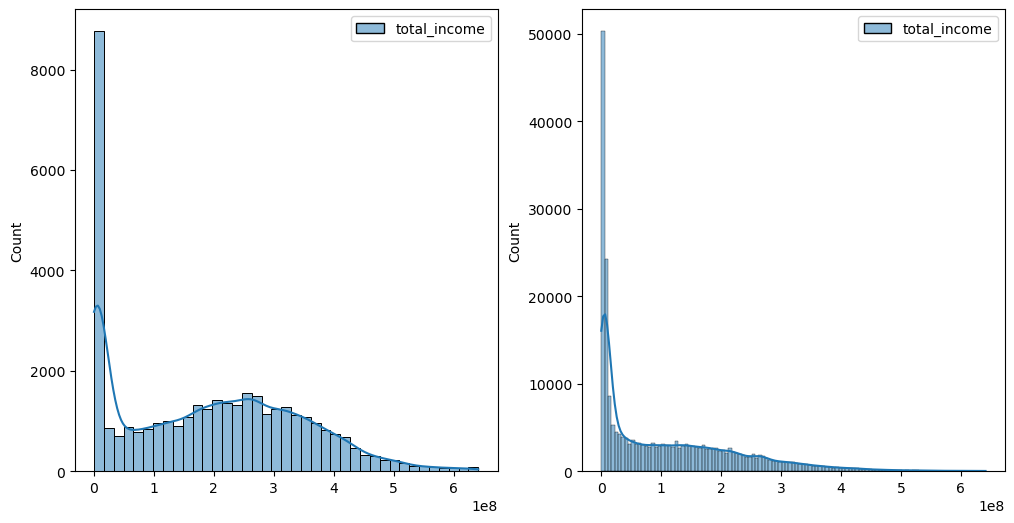

In [49]:
fig_degrees, ax_degrees = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(degree_incom, ax=ax_degrees[0], kde=True)
sns.histplot(No_degree_incom, ax=ax_degrees[1], kde=True)

In [50]:
stat, p_value = sp.stats.shapiro(degree_incom)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37710.
  res = hypotest_fun_out(*samples, **kwds)


In [51]:
stat, p_value = sp.stats.shapiro(No_degree_incom)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 235040.
  res = hypotest_fun_out(*samples, **kwds)


In [52]:
result = sp.stats.anderson(No_degree_incom.total_income)
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

	sl, cv = result.significance_level[i], result.critical_values[i]

	if result.statistic < result.critical_values[i]:

		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))

	else:

		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 11384.557
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


### HypoThesis test

In [53]:
#u_test

u_statistics, p_value = sp.stats.mannwhitneyu(degree_incom, No_degree_incom , alternative='two-sided')

print(f'statistic: {u_statistics}, p-value: {p_value}')

if p_value <0.05:

  print("we reject null hypothesis")

else:

  print("we accept null hypothesis")

statistic: [5.77972007e+09], p-value: [0.]
we reject null hypothesis


پس میان مجموع درآمد سالانه افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند تفاوت
معناداری وجود دارد

# incom family chaharmahal

In [84]:
family_incom_u1401=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_u1401.csv")
family_incom_r1401=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_r1401.csv")
family_incom_u1400=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_u1400.csv")
family_incom_r1400=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_r1400.csv")
family_incom_r99=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_r99.csv")
family_incom_u99=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_u99.csv")
family_incom_u98=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_u98.csv")
family_incom_r98=pd.read_csv(r"D:\Iranian_HEIS\data\Fateme_Dataset\family_incomes_chaharmahal_dataset_r98.csv")
family_incom_u1401.head()

,Address,Fasl,weight,khanevartype,province,town,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_netincome
0,11401171826,1,348.310329,1,CharmahalBakhtiari,1,750010000.0,0.0,1.049000e+09,0.0,1.799010e+09
1,11401171829,1,348.310329,1,CharmahalBakhtiari,1,440000000.0,0.0,3.600000e+06,12180000.0,4.557800e+08
2,11401171832,1,348.310329,1,CharmahalBakhtiari,1,0.0,0.0,9.836000e+07,6720000.0,1.050800e+08
3,11401171838,1,348.310329,1,CharmahalBakhtiari,1,0.0,350000000.0,3.504000e+07,17640000.0,4.026800e+08
4,11401171841,1,348.310329,1,CharmahalBakhtiari,1,0.0,525000000.0,1.236000e+07,8085000.0,5.454450e+08


### Calculate Real Income by Inflation and delet outliers

In [85]:
def calculate_real_income(nominal_df, inflation_rate):
    real_data = nominal_df.copy()
    real_data['total_netincome'] = real_data['total_netincome'] / (1 + inflation_rate)
    return real_data

In [86]:
year_1398_inflation_rate= 0.412
year_1399_inflation_rate= year_1398_inflation_rate + 0.471
year_1400_inflation_rate= year_1399_inflation_rate + 0.462
year_1401_inflation_rate= year_1400_inflation_rate + 0.465
real_year_u98 = calculate_real_income(family_incom_u98, year_1398_inflation_rate)
real_year_r98 = calculate_real_income(family_incom_r98, year_1398_inflation_rate)
real_year_u99 = calculate_real_income(family_incom_u99, year_1399_inflation_rate)
real_year_r99 = calculate_real_income(family_incom_r99, year_1399_inflation_rate)
real_year_u1400 = calculate_real_income(family_incom_u1400, year_1400_inflation_rate)
real_year_r1400 = calculate_real_income(family_incom_r1400, year_1400_inflation_rate)
real_year_u1401 = calculate_real_income(family_incom_u1401, year_1401_inflation_rate)
real_year_r1401 = calculate_real_income(family_incom_r1401, year_1401_inflation_rate)

real_year_r1401

,Address,Fasl,weight,khanevartype,province,town,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_netincome
0,21402545926,1,191.409659,1,CharmahalBakhtiari,2,619000000.0,0.000000e+00,41360000.0,6720000.0,2.373950e+08
1,21402545929,1,191.409659,1,CharmahalBakhtiari,2,0.0,3.700000e+08,115360000.0,6720000.0,1.751174e+08
2,21402545932,1,191.409659,1,CharmahalBakhtiari,2,900000000.0,0.000000e+00,63960000.0,17640000.0,3.493238e+08
3,21402545935,1,191.409659,1,CharmahalBakhtiari,2,0.0,4.000000e+08,138760000.0,17640000.0,1.980071e+08
4,21402545938,1,191.409659,1,CharmahalBakhtiari,2,0.0,0.000000e+00,411560000.0,12180000.0,1.507972e+08
...,...,...,...,...,...,...,...,...,...,...,...
482,21409553726,3,116.221112,1,CharmahalBakhtiari,9,600000000.0,0.000000e+00,165630000.0,6090000.0,2.746335e+08
483,21409553729,3,116.221112,1,CharmahalBakhtiari,9,480000000.0,5.000000e+07,231060000.0,10920000.0,2.747260e+08
484,21409553732,3,116.221112,1,CharmahalBakhtiari,9,0.0,1.250000e+09,21730000.0,17010000.0,4.586263e+08
485,21409553735,3,116.221112,1,CharmahalBakhtiari,9,0.0,0.000000e+00,224810000.0,630000.0,8.022776e+07


In [87]:
def drop_iqr_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

def drop_outliers(df):
    df = drop_iqr_outliers(df, ['total_netincome'])
    df = df[df['total_netincome']>0]
    return df

dfu1398 = drop_outliers(real_year_u98)
dfr1398 = drop_outliers(real_year_r98)
dfu1399 = drop_outliers(real_year_u99)
dfr1399 = drop_outliers(real_year_r99)
dfu1400 = drop_outliers(real_year_u1400)
dfr1400 = drop_outliers(real_year_r1400)
dfu1401 = drop_outliers(real_year_u1401)
dfr1401 = drop_outliers(real_year_r1401)

In [88]:
family_r=pd.concat([dfr1398,dfr1399 ,dfr1400, dfr1401] , axis=0)
family_r

,Address,Fasl,weight,khanevartype,province,town,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_netincome
0,21401545208,2,132.659492,1,CharmahalBakhtiari,1,144000000.0,0.000000e+00,2040000.0,16380000.0,1.150283e+08
1,21401545211,2,132.659492,1,CharmahalBakhtiari,1,0.0,2.882500e+08,1560000.0,16380000.0,2.168484e+08
2,21401545214,2,132.659492,1,CharmahalBakhtiari,1,0.0,0.000000e+00,50000000.0,10920000.0,4.314448e+07
3,21401545217,2,132.659492,1,CharmahalBakhtiari,1,0.0,0.000000e+00,22660000.0,5460000.0,1.991501e+07
4,21401545220,2,132.659492,1,CharmahalBakhtiari,1,0.0,0.000000e+00,33540000.0,5460000.0,2.762040e+07
...,...,...,...,...,...,...,...,...,...,...,...
482,21409553726,3,116.221112,1,CharmahalBakhtiari,9,600000000.0,0.000000e+00,165630000.0,6090000.0,2.746335e+08
483,21409553729,3,116.221112,1,CharmahalBakhtiari,9,480000000.0,5.000000e+07,231060000.0,10920000.0,2.747260e+08
484,21409553732,3,116.221112,1,CharmahalBakhtiari,9,0.0,1.250000e+09,21730000.0,17010000.0,4.586263e+08
485,21409553735,3,116.221112,1,CharmahalBakhtiari,9,0.0,0.000000e+00,224810000.0,630000.0,8.022776e+07


In [89]:
family_u=pd.concat([dfu1398,dfu1399 ,dfu1400, dfu1401] , axis=0)
family_u

,Address,Fasl,weight,khanevartype,province,town,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_netincome
0,11401171708,4,266.339013,1,CharmahalBakhtiari,1,2.928400e+08,0.0,0.000000e+00,10920000.0,2.151275e+08
1,11401171711,4,266.339013,1,CharmahalBakhtiari,1,3.679300e+08,200000000.0,5.190000e+06,21840000.0,4.213598e+08
2,11401171714,4,266.339013,1,CharmahalBakhtiari,1,2.679650e+08,0.0,5.190000e+06,21840000.0,2.089200e+08
3,11401171717,4,266.339013,1,CharmahalBakhtiari,1,0.000000e+00,0.0,1.800000e+08,5460000.0,1.313456e+08
4,11401171720,4,266.339013,1,CharmahalBakhtiari,1,1.000000e+08,0.0,1.800000e+08,16380000.0,2.099008e+08
...,...,...,...,...,...,...,...,...,...,...,...
652,11404179528,2,267.822168,1,CharmahalBakhtiari,4,1.273300e+09,0.0,1.128000e+09,15400000.0,8.600356e+08
653,11409183532,2,159.760632,1,CharmahalBakhtiari,9,0.000000e+00,0.0,9.562650e+08,3920000.0,3.417028e+08
654,11409183535,2,159.760632,1,CharmahalBakhtiari,9,6.000000e+08,0.0,8.202500e+07,10290000.0,2.463754e+08
655,11409183538,2,159.760632,1,CharmahalBakhtiari,9,7.200000e+08,0.0,8.702500e+07,10290000.0,2.908594e+08


In [90]:
family_income_u=family_u.drop(['Address' , 'Fasl' , 'weight' , 'khanevartype' , 'province', 'town' , 'Hoghugh_Income' , 'Azad_Income' ,'Other_Income' , 'Yarane_Income'] , axis=1)
family_income_u

,total_netincome
0,2.151275e+08
1,4.213598e+08
2,2.089200e+08
3,1.313456e+08
4,2.099008e+08
...,...
652,8.600356e+08
653,3.417028e+08
654,2.463754e+08
655,2.908594e+08


In [91]:
family_income_r=family_u.drop(['Address' , 'Fasl' , 'weight' , 'khanevartype' , 'province', 'town' , 'Hoghugh_Income' , 'Azad_Income' ,'Other_Income' , 'Yarane_Income'] , axis=1)
family_income_r

,total_netincome
0,2.151275e+08
1,4.213598e+08
2,2.089200e+08
3,1.313456e+08
4,2.099008e+08
...,...
652,8.600356e+08
653,3.417028e+08
654,2.463754e+08
655,2.908594e+08


<Axes: ylabel='Count'>

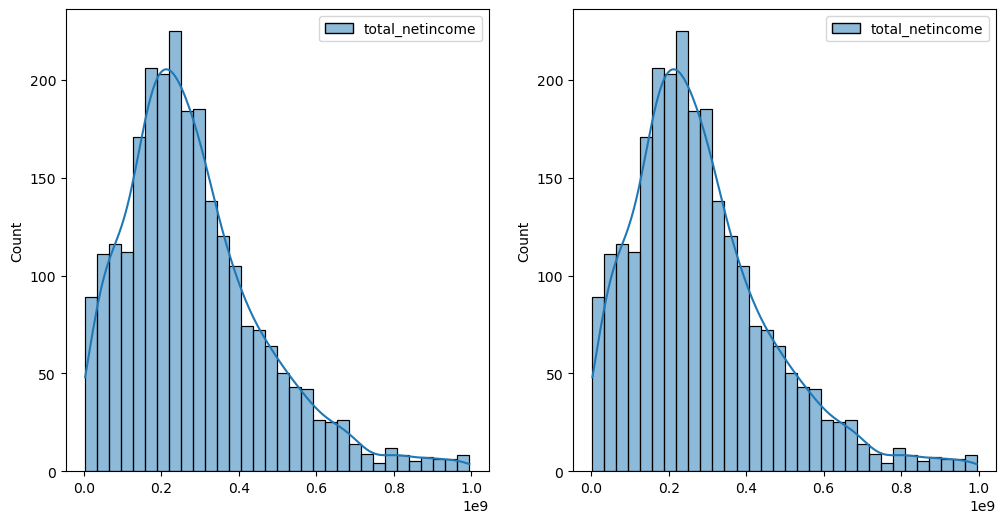

In [92]:
fig_family, ax_family = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(family_income_u, ax=ax_family[0], kde=True)
sns.histplot(family_income_r, ax=ax_family[1], kde=True)

In [93]:
stat, p_value = sp.stats.shapiro(family_income_u)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


In [94]:
stat, p_value = sp.stats.shapiro(family_income_r)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


### hypothesis test

In [95]:
#u_test

u_statistics, p_value = sp.stats.mannwhitneyu(family_income_r, family_income_u , alternative='two-sided')

print(f'statistic: {u_statistics}, p-value: {p_value}')

if p_value <0.05:

  print("we reject null hypothesis")

else:

  print("we accept null hypothesis")

statistic: [3040578.], p-value: [1.]
we accept null hypothesis


پس درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری با هم برابر است

# income U 1401 vs U 1400

In [108]:
members_u1400=pd.read_csv(r"D:\Iranian_HEIS\data\income_datasets\members_incomes_dataset_u1400.csv")
members_u1401=pd.read_csv(r"D:\Iranian_HEIS\data\income_datasets\members_incomes_dataset_u1401.csv")
members_u1401


,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Head,Male,38,literate,No,Diploma,employed,Married,852080008.0,0.0,207000000.0,735000.0,1.059815e+09
1,10001000425,2,Spouse,Female,35,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,6.370000e+06
2,10001000426,1,Head,Male,62,literate,No,Elemantry,IncomeWOJob,Married,400000000.0,0.0,740000000.0,735000.0,1.140735e+09
3,10001000432,1,Head,Male,70,literate,No,College,IncomeWOJob,Married,0.0,0.0,985000000.0,735000.0,9.857350e+08
4,10001000432,2,Spouse,Female,61,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,6.370000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40159,12603320429,2,Spouse,Female,68,literate,No,Elemantry,Housewife,Married,0.0,0.0,0.0,16380000.0,1.638000e+07
40160,12603320429,3,Child,Male,43,literate,No,Diploma,employed,Single,0.0,180000000.0,0.0,0.0,1.800000e+08
40161,12603320429,5,Child,Female,40,literate,No,Diploma,employed,Divorced,280000000.0,0.0,22350000.0,945000.0,3.032950e+08
40162,12603320429,6,Child,Male,37,literate,No,Diploma,employed,Single,0.0,520000000.0,0.0,0.0,5.200000e+08


In [109]:
def calculate_real_income(nominal_df, inflation_rate):
    real_data = nominal_df.copy()
    real_data['total_income'] = real_data['total_income'] / (1 + inflation_rate)
    return real_data

In [110]:
year_1398_inflation_rate= 0.412
year_1399_inflation_rate= year_1398_inflation_rate + 0.471
year_1400_inflation_rate= year_1399_inflation_rate + 0.462
year_1401_inflation_rate= year_1400_inflation_rate + 0.465
real_year_1400 = calculate_real_income(members_u1400, year_1400_inflation_rate)
real_year_1401 = calculate_real_income(members_u1401, year_1401_inflation_rate)
real_year_1401

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Head,Male,38,literate,No,Diploma,employed,Married,852080008.0,0.0,207000000.0,735000.0,3.771584e+08
1,10001000425,2,Spouse,Female,35,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,2.266904e+06
2,10001000426,1,Head,Male,62,literate,No,Elemantry,IncomeWOJob,Married,400000000.0,0.0,740000000.0,735000.0,4.059555e+08
3,10001000432,1,Head,Male,70,literate,No,College,IncomeWOJob,Married,0.0,0.0,985000000.0,735000.0,3.507954e+08
4,10001000432,2,Spouse,Female,61,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,2.266904e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40159,12603320429,2,Spouse,Female,68,literate,No,Elemantry,Housewife,Married,0.0,0.0,0.0,16380000.0,5.829181e+06
40160,12603320429,3,Child,Male,43,literate,No,Diploma,employed,Single,0.0,180000000.0,0.0,0.0,6.405694e+07
40161,12603320429,5,Child,Female,40,literate,No,Diploma,employed,Divorced,280000000.0,0.0,22350000.0,945000.0,1.079342e+08
40162,12603320429,6,Child,Male,37,literate,No,Diploma,employed,Single,0.0,520000000.0,0.0,0.0,1.850534e+08


In [111]:
def drop_iqr_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

def drop_outliers(df):
    df = drop_iqr_outliers(df, ['total_income'])
    df = df[df['total_income']>0]
    return df

df1400 = drop_outliers(real_year_1400)
df1401 = drop_outliers(real_year_1401)
df1401

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_income
0,10001000425,1,Head,Male,38,literate,No,Diploma,employed,Married,852080008.0,0.0,207000000.0,735000.0,3.771584e+08
1,10001000425,2,Spouse,Female,35,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,2.266904e+06
2,10001000426,1,Head,Male,62,literate,No,Elemantry,IncomeWOJob,Married,400000000.0,0.0,740000000.0,735000.0,4.059555e+08
3,10001000432,1,Head,Male,70,literate,No,College,IncomeWOJob,Married,0.0,0.0,985000000.0,735000.0,3.507954e+08
4,10001000432,2,Spouse,Female,61,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,2.266904e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40159,12603320429,2,Spouse,Female,68,literate,No,Elemantry,Housewife,Married,0.0,0.0,0.0,16380000.0,5.829181e+06
40160,12603320429,3,Child,Male,43,literate,No,Diploma,employed,Single,0.0,180000000.0,0.0,0.0,6.405694e+07
40161,12603320429,5,Child,Female,40,literate,No,Diploma,employed,Divorced,280000000.0,0.0,22350000.0,945000.0,1.079342e+08
40162,12603320429,6,Child,Male,37,literate,No,Diploma,employed,Single,0.0,520000000.0,0.0,0.0,1.850534e+08


In [112]:
u1400=df1400.drop(['Address' ,'relation', 'gender' , 'age' , 'literacy' , 'studying', 'occupationalst' ,'maritalst', 'member' , 'Hoghugh_Income' , 'Azad_Income' , 'degree', 'Other_Income' , 'Yarane_Income'] , axis=1)
u1400

,total_income
0,2.180299e+08
1,1.007122e+08
2,4.656716e+06
3,9.701493e+05
4,2.167036e+08
...,...
37552,4.234286e+08
37553,3.130661e+08
37554,4.656716e+06
37555,6.985075e+06


In [113]:
u1401=df1401.drop(['Address' ,'relation', 'gender' , 'age' , 'literacy' , 'studying', 'occupationalst' ,'maritalst', 'member' , 'Hoghugh_Income' , 'Azad_Income' , 'degree', 'Other_Income' , 'Yarane_Income'] , axis=1)
u1401

,total_income
0,3.771584e+08
1,2.266904e+06
2,4.059555e+08
3,3.507954e+08
4,2.266904e+06
...,...
40159,5.829181e+06
40160,6.405694e+07
40161,1.079342e+08
40162,1.850534e+08


<Axes: ylabel='Count'>

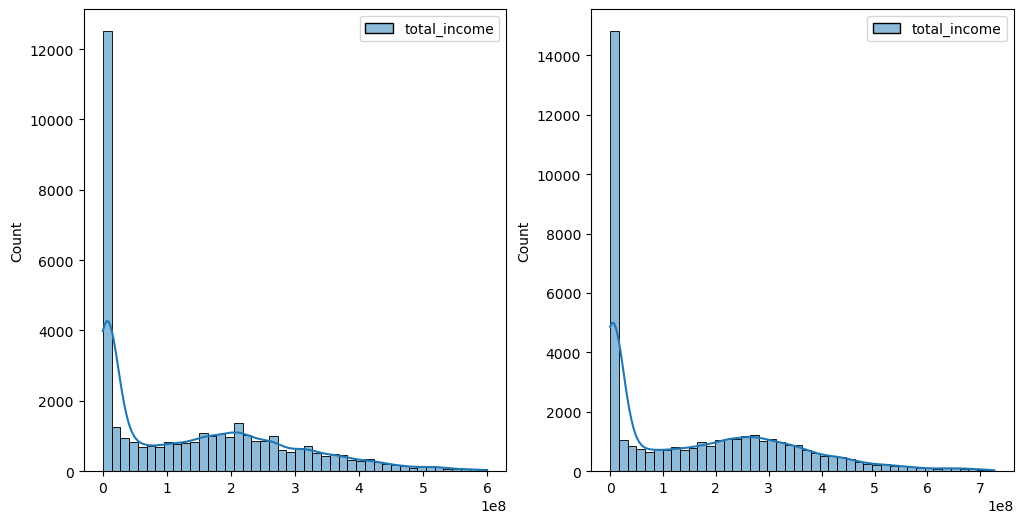

In [114]:
fig_u, ax_u = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(u1400, ax=ax_u[0], kde=True)
sns.histplot(u1401, ax=ax_u[1], kde=True)

In [115]:
stat, p_value = sp.stats.shapiro(u1400)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36956.
  res = hypotest_fun_out(*samples, **kwds)


In [116]:
stat, p_value = sp.stats.shapiro(u1401)
alpha = 0.05

if p_value > alpha:
	print('Sample is normal(fail to reject H0)')

else:
	print('Sample does not normal (reject H0)')

Sample does not normal (reject H0)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 39515.
  res = hypotest_fun_out(*samples, **kwds)


In [117]:
#u_test

u_statistics, p_value = sp.stats.mannwhitneyu(u1400, u1401 , alternative='less')

print(f'statistic: {u_statistics}, p-value: {p_value}')

if p_value <0.05:

  print("we reject null hypothesis")

else:

  print("we accept null hypothesis")

statistic: [7.26553131e+08], p-value: [0.11864536]
we accept null hypothesis
